In [2]:
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

import os,time
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
plt.rcParams.update({'font.size': 16})
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/PDFs")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/DetResponse")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Utils")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Spectra")

from Jfactor import *
from Signal import *


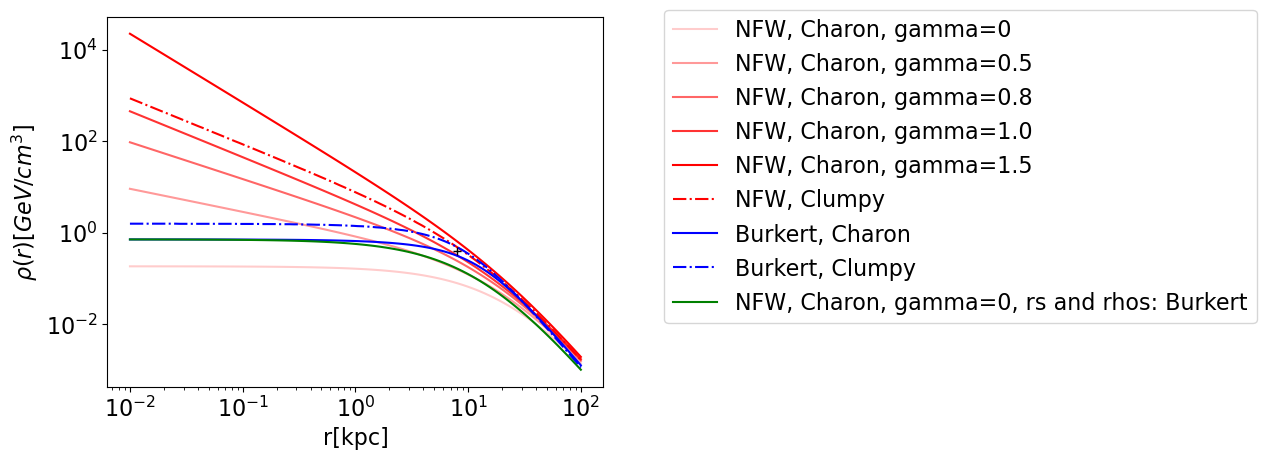

In [8]:
# Density from charon and clumpy
process = "ann"
profile = ["NFW", "Burkert"]
# Create Jfactor object
MyJ = Jf(process)
# Labels + color for the plot:
colors = {"NFW":'red', "Burkert":'blue'}

r = np.logspace(-2,2,100)
# Plot:
rs = {"NFW":24.42, "Burkert":12.67}
rhos = {"NFW":0.184, "Burkert":0.712}


# rs = {"NFW":12.0, "Burkert":9.26}
# rhos = {"NFW":0.42, "Burkert":4.13}

for pr in profile:
    MyJ.profile = pr
    P_Clumpy = MyJ.profile_Clumpy()
    if pr=='NFW':
        i=1
        for g in [0, 0.5, 0.8, 1., 1.5]:
            P_Charon = MyJ.profile_Charon(r, rs=rs[pr], rhos=rhos[pr], gamma=g)
            plt.plot(P_Charon["r"], P_Charon["rho"], color=colors[pr], label='{}, Charon, gamma={}'.format(pr, g), alpha=i/5.)
            i+=1
    else:
        P_Charon = MyJ.profile_Charon(r, rs=rs[pr], rhos=rhos[pr])
        plt.plot(P_Charon["r"], P_Charon["rho"], color=colors[pr], label='{}, Charon'.format(pr))
        
    plt.plot(P_Clumpy["r"], P_Clumpy["rho"], color=colors[pr], label='{}, Clumpy'.format(pr), linestyle='-.')
MyJ.profile = 'NFW'
P_Charon = MyJ.profile_Charon(r, rs=rs['Burkert'], rhos=rhos['Burkert'], gamma=0)
plt.plot(P_Charon["r"], P_Charon["rho"], color='green', label='NFW, Charon, gamma=0, rs and rhos: Burkert')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('r[kpc]')
plt.ylabel(r'$\rho(r)[GeV/cm^{3}]$')
plt.plot(8, 0.4, marker='+', color='black')

plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.legend()

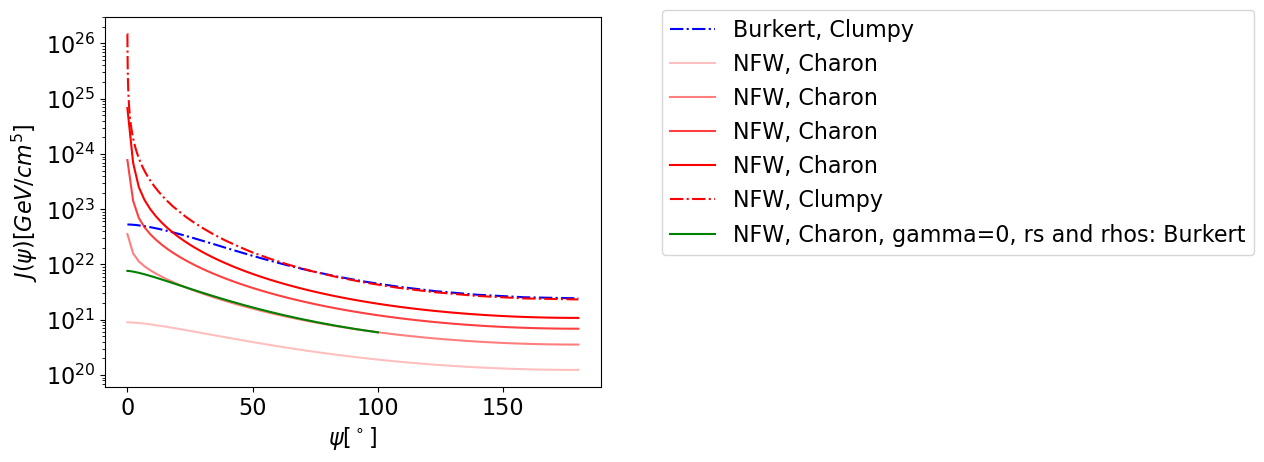

In [5]:
# Jfactor from Charon and Clumpy:
psi = np.linspace(0.,180,80)
profile=["Burkert", "NFW"]


for pr in profile:
    MyJ.profile = pr
    J_Clumpy = MyJ.Jfactor_Clumpy()
    J_Charon = MyJ.Jfactor_Charon(psi,rs=rs[pr], rhos=rhos[pr])
    if pr=='NFW':
        i=1
        for g in [0, 0.5, 0.8, 1.]:
            J_Charon = MyJ.Jfactor_Charon(psi,rs=rs[pr], rhos=rhos[pr], gamma=g)
            plt.plot(J_Charon["psi"], J_Charon["J"], color=colors[pr], label='{}, Charon'.format(pr), alpha=i/4.)
            i+=1
    plt.plot(J_Clumpy["psi"], J_Clumpy["J"], color=colors[pr], label='{}, Clumpy'.format(pr), linestyle='-.')
    # new = [J/np.pi for J in J_Charon["J"]]
    # plt.plot(J_Charon["psi"], J_Charon["J"], color=colors[pr], label='{}, Charon'.format(pr))

    # Save the Clumpy Jfactor
    # pkl.dump(J_Clumpy,open("JFactor_{}.pkl".format(pr),"wb"))
MyJ.profile = 'NFW'
J_Charon = MyJ.Jfactor_Charon(r, rs=rs['Burkert'], rhos=rhos['Burkert'], gamma=0)
plt.plot(J_Charon["psi"], J_Charon["J"], color='green', label='NFW, Charon, gamma=0, rs and rhos: Burkert')
    
# plt.yscale('log')
plt.semilogy()
plt.xlabel(r'$\psi[^\circ]$')
plt.ylabel(r'$J(\psi)[GeV/cm^{5}]$')
plt.legend(bbox_to_anchor=(1.1, 1.05))